## **CNN with CIFAR-10 Data**

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [ ]:
np.set_printoptions(suppress=True)     # 10 üssü e' li gosterimleri kapatmak icin 

In [ ]:
print(tf.__version__)

Bu notebook icin GPU acmamiza gerek yokmus.

In [4]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-03-11 23:55:57.843650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:55:57.902850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:55:57.903026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [5]:
#tf.config.list_physical_devices('GPU')    # Kullandigimiz cihaz GPU' yu okuyor mu?

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Release GPU memory to prevent memory-leaks.

#from numba import cuda
#device = cuda.get_current_device()
#device.reset()

In [7]:
#!nvidia-smi

Fri Mar 11 23:55:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0    23W /  N/A |      8MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Bu calismada cifar10 datasini kullanacagiz. 10 class' li bir dataseti. cifar datasinin farkli versiyonlari var, onlardaki class sayilari farkli. CNN' de cok yaygin kullanilan bir data bu yüzden keras' in icinde var :

In [8]:
from tensorflow.keras.datasets import cifar10         

(X_train, y_train), (X_test, y_test) = cifar10.load_data()      # cifar10 datasindaki train ve test datalarini bilgisayara ayri ayri indir.

X_train ve X_test' in uzunluguna baktik :

In [9]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


Shape' e bakmak icin datadan herhangi bir resim sectik. 32x32x3 imis. Kanal bilgisi de 3 olarak verilmis (Yani renkli resim) :

In [10]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

Sample üzerinden incelememize devam ediyoruz. Datamiz numpy array seklinde :

In [11]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

5. indexteki resmi yazdirdik. Resmimiz kirmizi bir araba :

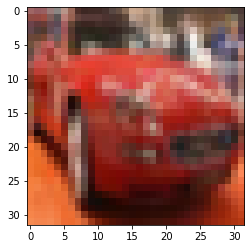

In [12]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

5. indexteki sample' in class' i 1 imiş :

In [13]:
y_train[5]

array([1], dtype=uint8)

In [14]:
y_train.shape

(50000, 1)

y_train' in icinde 50000 resme karsilik gelen 50000 class var. Bunlar scaler büyüklükler oldugu icin bu haliyle modele verirsek model regression yapilacagini dusunur. Bu yuzden ilerleyen asamalarda bu degerleri kategorik olarak tanimlayacagiz.

y_train' deki unique degerleri dondurduk. unique degerlerden icinde kacar tane var bunu gormek icin __return_counts=True__ dedik. Her bir unique degere (classa) karsilik gelen sayiyi veriyor. 10 class' in her birinde 5000 deger varmis. Datamiz da 10*5000=50000 idi. (Her class' ta ayni sayida deger var) :

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

__Class sayilarina karsilik gelen isimleri kolaylik olmasi acisindan yazdik :__

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

Gercek class isimlerini liste biciminde bir degiskene atadik ki ilerde herhangi bir class' in hangisine ait oldugunu öğrenmek icin index' leyebilelim :

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[int(y_train[0])]    # y_train' deki 0. class' in ismini indexleyerek ogrenebildik. 

0-50000 arasinda rastgele size=1 olan deger döndür :

In [17]:
int(np.random.randint(low=0, high=50000, size=1))     #int icine yazmazsak array olur.

38395

Yukaridaki kodu  X_train icine verdik ve rastgele bir resmin degeri döndü :

In [18]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[[210, 215, 225],
        [222, 224, 236],
        [209, 215, 234],
        ...,
        [114, 140, 124],
        [152, 171, 158],
        [161, 173, 166]],

       [[198, 210, 226],
        [203, 212, 228],
        [195, 208, 229],
        ...,
        [100, 135, 116],
        [114, 141, 125],
        [ 98, 113, 104]],

       [[189, 205, 221],
        [172, 186, 200],
        [172, 190, 207],
        ...,
        [ 65,  98,  79],
        [ 70,  94,  79],
        [ 64,  78,  69]],

       ...,

       [[120, 127, 132],
        [119, 126, 130],
        [120, 127, 130],
        ...,
        [130, 135, 138],
        [130, 137, 141],
        [124, 129, 134]],

       [[123, 128, 132],
        [122, 126, 130],
        [122, 127, 131],
        ...,
        [126, 131, 134],
        [126, 131, 135],
        [124, 129, 133]],

       [[216, 220, 222],
        [213, 217, 219],
        [214, 218, 220],
        ...,
        [214, 218, 220],
        [213, 218, 220],
        [213, 217, 219]]

, 

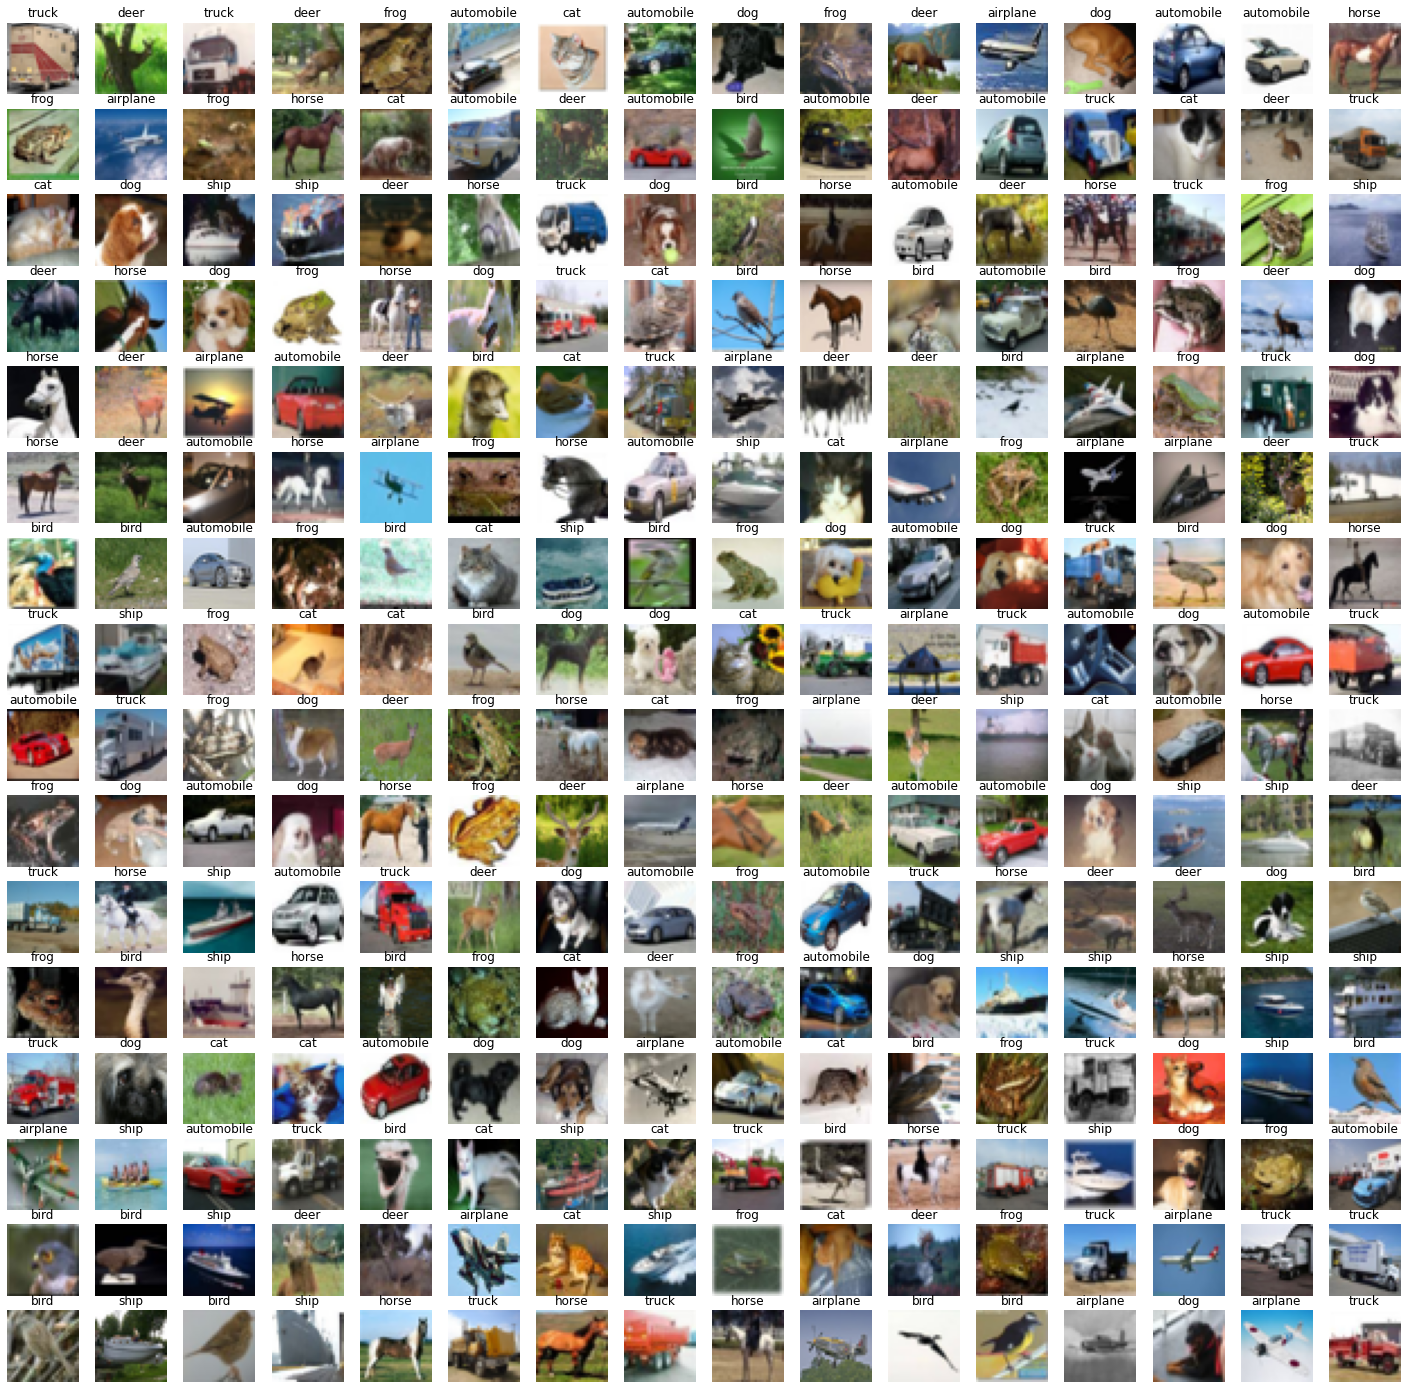

In [19]:
plt.figure(figsize=(25, 25))
for i in range(256):                                               # 256 tane resim ciz (256 dahil degil)
    rand_index = int(np.random.randint(low=0, high=50000, size=1)) # 0-5000 arasinda random bir deger döndür.
    plt.subplot(16, 16, i+1)                                       # label=classes[int(y_train[rand_index])] de eklenebilirdi.
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])                   # y_train' deki class' a karsilik gelen class ismini getir.
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

252

Resimleri normalize etmek icin train testlerini 255'e böldük ve böylece normalize etmis olduk :

In [22]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                      # Train setleri 3 boyutlu array halinde (32x32x3). Her bir pixel' i 255' e bölecek.
X_test /= 255

In [23]:
X_train[5].min()    

0.0

In [24]:
X_train[5].max()      # Normalize isleminden sonra 0-1 arasina geldi. (Resimde en fazla 252 vardi, bu yüzden 1 degeri cikmadi.)

0.9882353

__imshow__, icine array alir ve datayi resim olarak ekrana yazdirir (Shift+tab ile ozellikleri incele) :

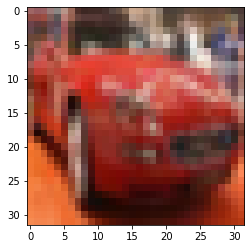

In [25]:
plt.imshow(X_train[5])

Train ve test setlerindeki her bir ornegin boyutu ayni (32x32x3), sample sayilari farkli :

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

y_train' i bu haliyle modele verirsek model bunu regression modeli olarak gorecektir. Bu yuzden asagida y_train ve y_test' i categorical degerlere cevirecegiz :

In [27]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

__(y_train, 10)__ ---> 10 sayisi kac class oldugunu soyler. Yazmak zorunlu degildir sistem kac class oldugunu kendisi algilar fakat okunabilirlik acisindan yazmak gerekir :

In [29]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape                  # 0' dan 10' a kadar 10 class degeri aldi.

(10000, 10)

0. indexteki resim hangi class' a ait ise o class degeri 1, digerleri 0 :

In [ ]:
Y_train[0]

#### Dropout layer extra info

[External link to the keras documentation about dropout layers. An important read!](https://keras.io/api/layers/regularization_layers/dropout/)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

__padding='same'__ sectik cunku giren resim boyutu ile cikan resim boyutunun ayni olmasini istiyoruz. Eger same yerine valid verirsek resim her filtrede kuculecek ki elimizdeki resimlerin boyutlari zaten kucuk, daha fazla kuculmesini istemiyoruz.

Asagidaki modelde 2 Convolution' isleminden sonra Maxpooling ekledik. (Her layer' da pooling eklemek zorunda degiliz)

Ciktidaki kanal sayisinin input size ile bir ilgisi yok. Kanal sayisi; filtre sayisi, padding, kernel_size, stride ile belirlenir.

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

# 3x3' lük 32 filtre adet sec, gelen her resmin boyutu 32x32, channel sayisi=3 (Ciktidaki kanal sayisi 32 olacak cunku 32 filtre belirledik)

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

# 3x3' lük 64 adet filtre sec, gelen her resmin boyutu 32x32, channel sayisi=3 (Ciktidaki channel sayisi 64 olacak)

model.add(MaxPool2D(pool_size=(2, 2)))

# MaxPooling isleminden sonraki outputta her resmin boyutu 16x16 (Her bir stride degeri icin yariya duser, burada stride 1; 2 üssü1' den iki kat duser) 
# Ciktidaki channel sayisi=64 (MaxPooling channel sayisini etkilemez)

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# Flatten ile tum matrisler tek bir row' a dönüştü.

model.add(Dense(128, activation='relu'))      # Fully conncted aşaması

model.add(Dense(64, activation='relu'))       # Fully conncted aşaması

model.add(Dense(10, activation='softmax'))    # Output. Softmax ile olasilik degerlerinin toplaminin 1 olmasini garantiler.

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-11 23:56:06.152414: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-11 23:56:06.152846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:56:06.153048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:56:06.153180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

Modeli tanimlarken ilk layer' a __input_shape__ verdigimiz icin model.summary' e bakabiliriz. Modelde egitilmesi gereken toplam 309034 parametre var :

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

__eary_stop --->__ Izledigin metric (val_los) ard arda 5 epoch boyunca iyilesmezse egitimi bitir :

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

Egitimde validation datayi train datasindan split etmedik direk test setlerini verdik. CNN' de egitim uzun sürdüğü icin epoch=50 verdik. 

Model her epoch' ta su islemi yapar : Her batch_size' da bir train datasiyla skor alir, tüm batch' lerden aldigi skorlar bittigi anda validation datasiyla skor alir ve bunlari birbiriyle kiyaslar. Yani accuracy her batch sonunda hesaplanir, val_accuracy tüm batch skorlari alindiktan sonra epoch sonunda bir kere hesaplanir :

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

2022-03-11 23:56:07.479496: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-11 23:56:07.834631: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50


2022-03-11 23:56:08.755740: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


1563/1563 [==============================] - 10s 6ms/step - loss: 1.3723 - accuracy: 0.5001 - val_loss: 1.0851 - val_accuracy: 0.6106
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9457 - accuracy: 0.6671 - val_loss: 0.8947 - val_accuracy: 0.6793
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7896 - accuracy: 0.7229 - val_loss: 0.8251 - val_accuracy: 0.7036
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6862 - accuracy: 0.7599 - val_loss: 0.8701 - val_accuracy: 0.7072
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6032 - accuracy: 0.7894 - val_loss: 0.8211 - val_accuracy: 0.7200
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5268 - accuracy: 0.8147 - val_loss: 0.8453 - val_accuracy: 0.7262
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4664 - accuracy: 0.8349 - val_loss: 0.8624 - val_accuracy: 0.7255
Ep

Son epoch' ta train accuracy : 0.88 iken val_acccuracy : 0.71 . Train ve test set skorlari arasinda yuksek fark oldugu goruluyor. Modelimiz overfit olmus.

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.history.history

{'loss': [1.3723323345184326,
  0.9457103610038757,
  0.789635419845581,
  0.6862335205078125,
  0.6032431125640869,
  0.5268482565879822,
  0.46640992164611816,
  0.40705424547195435,
  0.35872742533683777,
  0.3111843466758728],
 'accuracy': [0.5000600218772888,
  0.6671199798583984,
  0.7228999733924866,
  0.7598599791526794,
  0.7893800139427185,
  0.8147199749946594,
  0.8348600268363953,
  0.8563600182533264,
  0.8724200129508972,
  0.8897799849510193],
 'val_loss': [1.0851049423217773,
  0.8947256803512573,
  0.8251330256462097,
  0.8700646758079529,
  0.8210573196411133,
  0.8452633619308472,
  0.862372875213623,
  0.9038333892822266,
  0.9426745176315308,
  1.0390102863311768],
 'val_accuracy': [0.6105999946594238,
  0.6793000102043152,
  0.7035999894142151,
  0.7071999907493591,
  0.7200000286102295,
  0.7261999845504761,
  0.7254999876022339,
  0.718500018119812,
  0.730400025844574,
  0.7107999920845032]}

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  1.372332   0.50006  1.085105        0.6106
1  0.945710   0.66712  0.894726        0.6793
2  0.789635   0.72290  0.825133        0.7036
3  0.686234   0.75986  0.870065        0.7072
4  0.603243   0.78938  0.821057        0.7200

Baslangic degerlerinde (ilk epoch) val_loss degeri loss degerinden daha düşük. Cünkü val_los her epoch sonunda hesaplanirken loss degeri epoch icinde her batch' ten sonra hesaplanir. val_los skoru ilk epoch egitimi bittikten sonra alindigi icin baslangic noktasindaki skor daha iyi :

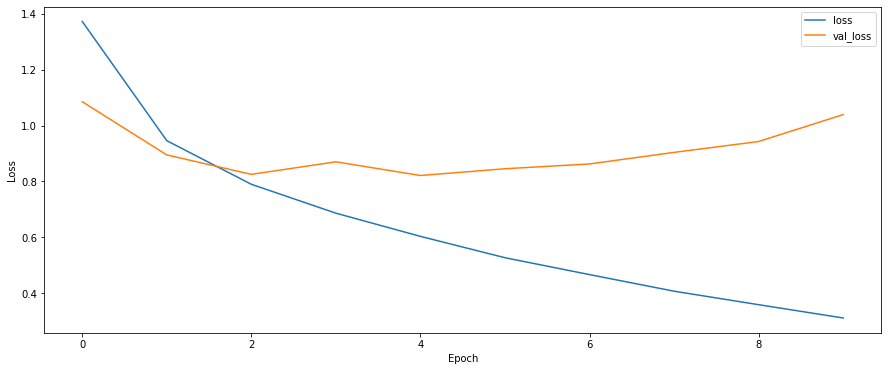

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

Ayni sekilde baslangic epoch' unda val_accuracy, accuracy degerinden daha yüksek cunku epoch sonunda hesaplanir. val_accuracy belli bir noktaya kadar yükseliyor ve sonra yükselmesi duruyor. epoch => 2 ve 3 civarlarinda model overfit oluyor diyebiliriz :

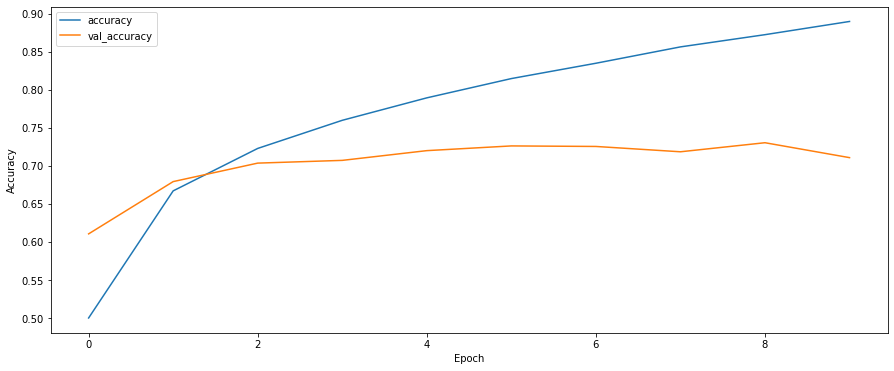

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [41]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 1s 2ms/step - loss: 1.0390 - accuracy: 0.7108
[1.0390102863311768, 0.7107999920845032]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

X_test ile prediction alacagiz :

In [43]:
preds = model.predict(X_test)


Her bir resim adına 10 class icin 10 farkli olasilik degeri dönecek. argmax ile bu olasilik degerleri arasinda en yüksek olan degerleri cagirdik ki bir resmin hangi class' a ait olma olasiliginin en yuksek oldugu bilgisini alalim :

In [44]:
predictions = np.argmax(preds, axis=1)

In [45]:
predictions

array([3, 8, 8, ..., 5, 5, 7])

argmax ile resimlerin ait olabilecekleri max degerdeki class bilgisini aldiktan sonra asagida skorlari yazdirabiliriz :

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.91      0.77      0.84      1000
           2       0.57      0.64      0.60      1000
           3       0.54      0.47      0.50      1000
           4       0.68      0.64      0.66      1000
           5       0.65      0.54      0.59      1000
           6       0.86      0.72      0.78      1000
           7       0.72      0.81      0.76      1000
           8       0.73      0.89      0.80      1000
           9       0.80      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [47]:
print(confusion_matrix(y_test, predictions))

[[803   6  40   8  12   6   3  10  91  21]
 [ 38 774   8   7   1   4   4   2  59 103]
 [100   2 635  57  58  34  35  36  30  13]
 [ 54   2 101 468  68 153  45  57  35  17]
 [ 30   5 109  34 643  34  18 102  18   7]
 [ 28   5  75 196  37 536  12  77  25   9]
 [ 16   4  73  52  72  26 719  11  15  12]
 [ 29   1  38  31  37  31   2 810  10  11]
 [ 50   7  18   4   4   1   1   6 892  17]
 [ 44  44  11   2   7   2   1  16  45 828]]


Test skoru 0.71, son epoch' taki train skoru ise 0.88 idi. Modelimiz overfit oldu :

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0390102863311768
Test accuracy: 0.7107999920845032


Datadan herhangi bir image secip modele tahmin yaptiracagiz. Bunun icin asagida resmimizin boyutlarini ayarlayarak modele verdik :

In [49]:
my_image = X_test[44]

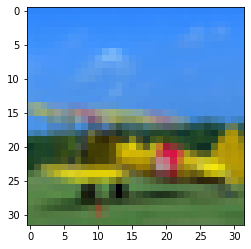

In [50]:
plt.imshow(my_image)

__reshape(1,32,32,3) ---->__ Modelimize 32x32x3 boyutlu __1__ resim verdigimizi belirtmek zorundayiz. Cunku model 4 boyut uzerinden egitildi (50000,32,32,3). Modele bir örnek gönderdigimizi belirtmemiz gerekir. 32x32x3 seklinde verirsek model, resmin boyutunu anlayamaz :

In [51]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [52]:
image_prediction

array([[0.99974114, 0.00001128, 0.000002  , 0.00000003, 0.00000015,
        0.00000001, 0.        , 0.        , 0.00001805, 0.00022739]],
      dtype=float32)

Bu resimde her class icin olasilik degerleri alindi, asagidaki kod ile bu olasilik degerlerinden en yuksek olani sectik ve modelin bu resmi hangi class' a atadigini bulmus olduk :

In [53]:
np.argmax(image_prediction, axis=1)

array([0])

In [54]:
result=np.argmax(image_prediction, axis=1)

In [55]:
result

array([0])

Daha once classes degiskeninde class isimlerini tanimlamistik. Modelin buldugu 0 class' inin gercek isminin ne oldugu bilgisini yazdirdik :

In [56]:
classes[int(result)]

'airplane'

In [57]:
#model.save("cnn-1.h5")

### DropOut

Yukardaki modele ek olarak 2 dropout ekledik, 1 fully connected layer ile egitimimizi yaptik.

__Dropout(0.4) --->__ Her filter içindeki parametreleri her backprobagation işleminden sonra belirtilen oranda kapatır (örneğin 3x3 filterda 9 parametre var. Bunların örneğin %30'unu kapatıyor, bunu herbir filterda yapıyor.). Sadece eğitim esnasında modelin ezberlemesini engellemek için bu işlem uygulanır. train/val/test setleri ile skor alınma işleminin dropout ile bir ilişkisi yoktur. 

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [59]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [61]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-11 23:57:36.295225: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-11 23:57:36.640798: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3754 - accuracy: 0.5027 - val_loss: 1.0597 - val_accuracy: 0.6302
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9934 - accuracy: 0.6475 - val_loss: 0.8900 - val_accuracy: 0.6925
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8444 - accuracy: 0.7028 - val_loss: 0.7929 - val_accuracy: 0.7287
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7504 - accuracy: 0.7338 - val_loss: 0.7519 - val_accuracy: 0.7389
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6811 - accuracy: 0.7568 - val_loss: 0.7306 - val_accuracy: 0.7479
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6134 - accuracy: 0.7817 - val_loss: 0.6996 - val_accuracy: 0.7600
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5694 - accuracy: 0.7975 - val_loss: 0.7285 -

Droput kullanmadan once aldigimiz en yuksek accuracy 0.71 iken droput kullandiktan sonra 0.76' ya cikti. Overfiti bir nebze önlemis olduk.

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8310430645942688
Test accuracy: 0.7698000073432922


In [63]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.87      0.90      0.89      1000
           2       0.65      0.69      0.67      1000
           3       0.58      0.56      0.57      1000
           4       0.73      0.74      0.73      1000
           5       0.68      0.65      0.66      1000
           6       0.79      0.83      0.81      1000
           7       0.79      0.83      0.81      1000
           8       0.89      0.87      0.88      1000
           9       0.87      0.87      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [65]:
print(confusion_matrix(y_test, predictions))

[[778  14  66  23   9   5  12  19  47  27]
 [  7 898   3   9   2   3  11   2  14  51]
 [ 46   3 687  49  74  49  59  20   9   4]
 [ 15  11  80 557  66 148  50  53   9  11]
 [ 15   1  57  45 738  28  50  56   7   3]
 [  6   4  59 158  47 646  17  52   5   6]
 [  2   4  44  63  24  21 830   6   4   2]
 [ 12   2  36  26  43  38   5 828   5   5]
 [ 34  25  14  15   6   7   8   3 866  22]
 [ 13  65   8  15   3   2   4   8  12 870]]


<AxesSubplot:>

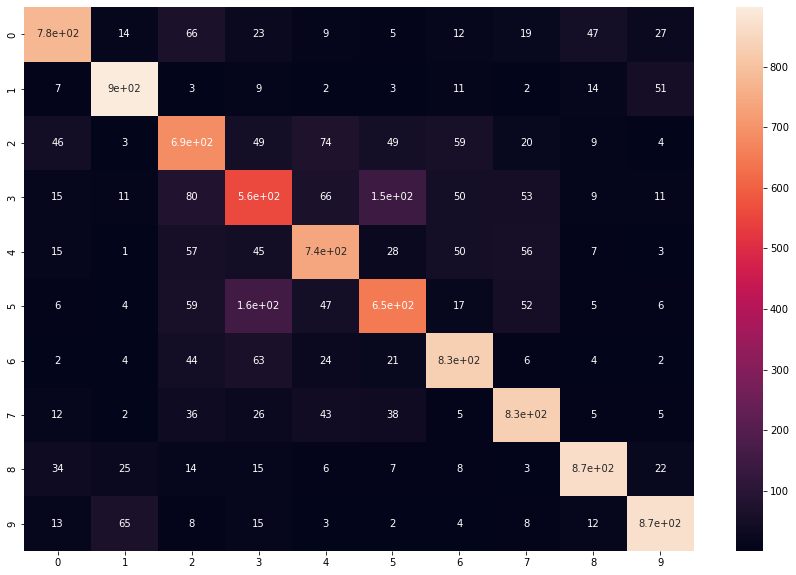

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### BatchNormalization

Normalization isleminde ortalama 0, varyans 1 olacak sekilde normalize islemi yapilir. Ara layer' larda standart normalization islemi uygulamak istemiyoruz, varyansin daha büyük olmasini istiyoruz. ReLu ile negatif degerler sifirlaniyor ve bilginin bir kismi kaybediliyor. Bunu onlemek icin normalization icine beta ve gama parametreleri eklenmis. Gama ve beta parametreleri egitilebilir parametrelerdir. Yani BatchNormalization icinde egitilebilir 2 tane parametre vardir. Ortalama gama ile carpilip üzerine beta eklenir. Model, bu parametreleri egiterek onceki layer' dan gelen bilgiye gore nasil normalize islemi yapmasi gerektigini kendisi öğrenir. Standart bir normalize islemi yerine modelin kendi normalize islemini kendisinin yapmasini saglamis oluyoruz.

BatchNormalization her batch sonrasinda backpropagation' dan etkilenir cunku  2 adet egitilebilir parametresi var. Bu sebeple her batch' ten sonra nasil normalize islemi yapmasi gerektigini daha cok öğrenir.

BatchNormalization' da ogrenebilir parametreler oldugu icin, istatistiksel olarak dropout' u BatchNormalization' larin tamami bittikten sonra yapmak daha saglikli olabilir.

In [67]:
from tensorflow.keras.layers import BatchNormalization

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

Asagida Conv islemi ile acitavtion islemini ayirmak istersek; model.add(Conv2D(256, (3,3), padding='same', activation='relu')) kodunda activation=None yazip arkasindan BatchNormalization' i ekleyip sonra activation='relu' yu ekleyebiliriz (Ilk ortaya ciktiginda bu sekilde kullaniliyormus).

In [71]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-12 00:11:43.402142: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5087 - accuracy: 0.4816 - val_loss: 1.1558 - val_accuracy: 0.5857
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9236 - accuracy: 0.6833 - val_loss: 0.8781 - val_accuracy: 0.6967
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7248 - accuracy: 0.7572 - val_loss: 0.6810 - val_accuracy: 0.7720
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6035 - accuracy: 0.7987 - val_loss: 0.6465 - val_accuracy: 0.7781
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4980 - accuracy: 0.8349 - val_loss: 0.5724 - val_accuracy: 0.8089
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4095 - accuracy: 0.8632 - val_loss: 0.5530 - val_accuracy: 0.8196
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3315 - accuracy: 0.8913 - val_loss: 0

BatchNormalization isleminden sonra val_accuracy degerimiz 0.82' ye kadar cikmis. Fakat train setinin skoru da 0.96' ya ciktigi icin modelimiz hala overfit durumunda diyebiliriz. (Image' ler cok kucuk oldugu icin datamiz overfit olmaya cok yatkin bir data)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))